# Analysis of Lending club loan dataset

### Libraries

In [105]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import datetime

#### Plotting with seaborn

In [106]:
import seaborn as sns
sns.set_style("white")
plt.rcParams["figure.figsize"] = (12, 6)

#### Scikit-learn stuff

In [211]:
from sklearn.preprocessing import MinMaxScaler

### Helper functions 

In [4]:
def get_col_info(data_col):
    """
    data_col  - a column from the dataframe
    """
    description = data_col.describe()
    missing_vals = np.count_nonzero(data_col.isnull())
    print(description)
    print("Total Missing values = {0}".format(missing_vals))
    return None
    
def plot_categorical_counts(data, **kwargs):
    """
    For categorical variables, get an idea of how the data is split
    """
    sns.countplot(data,**kwargs)

In [130]:
def replace_non_null_dates(x):
    """
    x is a string formatted date such as Sep-2015
    """
    if x == np.nan:
        return x
    else:
        return datetime.datetime.strptime(str(x),'%b-%Y')

In [142]:
def convert_cr_line_days(x):
    """
    Get how many months elapsed since earliest credit line to today
    """
    # Should this be to the issue date?
    if x == np.nan:
        return x
    else:
        oct_01 = datetime.datetime.strptime('01-Oct-2017','%d-%b-%Y')
        days = (oct_01 - replace_non_null_dates(x)).days
        return days

In [170]:
def drop_joint_apps(df):
    """
    Drop joint applications in place
    """
    df.drop(df[df['application_type']=='JOINT'].index, inplace=True)
    return None

In [171]:
def drop_post_app_features(df):
    """
    Drop all the features that contain information that would not have been available at 
    application stage
    """
    future_imports = ['acc_now_delinq','collection_recovery_fee','collections_12_mths_ex_med',
                      'delinq_2yrs','funded_amnt','funded_amnt_inv','inq_fi','inq_last_12m',
                      'inq_last_6mths','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d',
                      'il_util','all_util','loan_status','max_bal_bc','mths_since_last_delinq',
                      'mths_since_last_major_derog','mths_since_last_record',
                      'mths_since_rcnt_il','next_pymnt_d','open_acc','open_acc_6m',
                      'open_il_12m','open_il_24m','open_il_6m','open_rv_12m','open_rv_24m',
                      'out_prncp' ,'out_prncp_inv','pymnt_plan','recoveries','sub_grade',
                      'tot_coll_amt','tot_cur_bal','total_bal_il','total_cu_tl',
                      'total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee',
                      'total_rec_prncp']
    df.drop(labels=future_imports, axis=1,inplace=True)
    return None

In [172]:
def drop_joint_app_features(df):
    """
    Drop joint applications from the data
    """
    joint_cols = ['dti_joint', 'verified_status_joint', 'annual_inc_joint']
    df.drop(labels=joint_cols,axis=1, inplace=True)
    return None

In [224]:
def drop_other_unused_features(df):
    """
    These features are either missing many values or don't add much to the data
    """
    drop_labels = ['url','desc','title',
               'emp_title','issue_d','policy_code','grade','id',
                   'member_id','application_type']
    df.drop(labels=drop_labels,axis=1,inplace=True)
    return None

In [ ]:
def drop_rows_missing(df):
    

In [201]:
def transform_skewed_features(df):
    """
    Apply a logarithmic transformation on the skewed features
    Here df only contains the features that need to be transformed
    """
    df = df.apply(lambda x: np.log(x + 1))
    return df

In [213]:
def scale_min_max(df, numerical_feature_list):
    """
    Scale numerical features to lie between 0 and 1
    """
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler()
    df[numerical_feature_list] = scaler.fit_transform(df[numerical_feature_list])
    return df

## Exploration of the data

### Data dictionary 

In [5]:
df_dict = pd.read_excel('../data/LCDataDictionary.xlsx')

In [6]:
df_dict.shape

(80, 2)

#### Set formatting options for pandas

In [44]:
pd.set_option('display.max_colwidth', -1)

In [45]:
pd.options.display.max_rows = 100
pd.set_option('precision', 5)

#### What's in the data?

In [14]:
df_dict

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


#### Thoughts

If I am trying to predict interest rate that the loan will be offered - then I need to be careful with only including the data that would be there at the acquisition stage. There should be no data that is date after the issue_d at the very least



### Exploring the data

In [7]:
df_loan = pd.read_csv('../data/loan.csv',low_memory=False)

In [8]:
df_loan.shape

(887379, 74)

In [9]:
df_loan.columns.sort_values()

Index(['acc_now_delinq', 'addr_state', 'all_util', 'annual_inc',
       'annual_inc_joint', 'application_type', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'desc', 'dti', 'dti_joint',
       'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'home_ownership', 'id', 'il_util',
       'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths',
       'installment', 'int_rate', 'issue_d', 'last_credit_pull_d',
       'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status',
       'max_bal_bc', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_major_derog', 'mths_since_last_record',
       'mths_since_rcnt_il', 'next_pymnt_d', 'open_acc', 'open_acc_6m',
       'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m',
       'open_rv_24m', 'out_prncp', 'out_prncp_inv', 'policy_code', 'pub_rec',
       'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util',
       'sub_grade'

In [10]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

Verified status joint is the same as verification status joint - let's rename this field

In [11]:
df_loan.rename(index=str, columns={"verification_status_joint":"verified_status_joint",
                                   "total_rev_hi_lim":"total_rev_hi_lim"},inplace=True)

### Sample down to 30000 rows

In [214]:
sample_loan_df = df_loan.sample(n=30000, random_state=21)

In [215]:
sample_loan_df.shape

(30000, 74)

#### Mismatch between data dictionary and loan file features?

In [216]:
df_dict[~df_dict['LoanStatNew'].isin(df_loan.columns)]

,LoanStatNew,Description
13,fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
14,fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.
24,is_inc_v,"Indicates if income was verified by LC, not verified, or if the income source was verified"
27,last_fico_range_high,The upper boundary range the borrower’s last FICO pulled belongs to.
28,last_fico_range_low,The lower boundary range the borrower’s last FICO pulled belongs to.
71,total_rev_hi_lim,Total revolving high credit/credit limit
78,NaN,NaN
79,NaN,* Employer Title replaces Employer Name for all loans listed after 9/23/2013



#### Missing FICO scores in loan data

If I am looking to predict interest rates charged, then FICO ranges is probably quite important - but let's see what can be done in the absence of FICO

#### Issue and credit pulled dates

In [ ]:
df_loan['issue_d'].head()

In [ ]:
df_loan['issue_d'].value_counts().head()

In [23]:
df_loan['issue_d'] = df_loan['issue_d'].apply(lambda x: datetime.datetime.strptime(x,'%b-%Y'))

In [24]:
df_loan['issue_d'].value_counts().head()

2015-10-01    48631
2015-07-01    45962
2015-12-01    44342
2014-10-01    38782
2015-11-01    37530
Name: issue_d, dtype: int64

In [27]:
get_col_info(df_loan['last_credit_pull_d'])

count     887326  
unique    103     
top       Jan-2016
freq      730574  
Name: last_credit_pull_d, dtype: object
Total Missing values = 53


In [28]:
df_loan['last_credit_pull_d'].value_counts().head()

Jan-2016    730574
Dec-2015    19308 
Nov-2015    11490 
Oct-2015    10419 
Sep-2015    10087 
Name: last_credit_pull_d, dtype: int64

In [30]:
df_loan['last_credit_pull_d'].fillna('Jan-1900',inplace=True)

In [31]:
df_loan['last_credit_pull_d'] = df_loan['last_credit_pull_d'].apply(lambda x: replace_non_null_dates(x))

In [32]:
df_loan['last_credit_pull_d'].value_counts().head()

2016-01-01    730574
2015-12-01    19308 
2015-11-01    11490 
2015-10-01    10419 
2015-09-01    10087 
Name: last_credit_pull_d, dtype: int64

In [38]:
len(df_loan[df_loan['last_credit_pull_d']=='1900-01-01'].index)

53

In [41]:
df_loan[(df_loan['issue_d'] > df_loan['last_credit_pull_d'])& (df_loan['last_credit_pull_d'] != '1900-01-01')][['issue_d','last_credit_pull_d']].count()

issue_d               707
last_credit_pull_d    707
dtype: int64

Most of the credit pulls are after the issue date - not much use of this field either

### Initial thoughts

What is the problem that I am trying to solve here? I want to see if I can predict the interest rate a customer will get at Lending club with only data available at the applicatoin stage. 

Lending club already has information on their rates here - https://www.lendingclub.com/public/rates-and-fees.action 

![Grades chart](./images/Grades.png)



On the website if you go through the process, they ask you for your credit score, amount of loan and what you want this for. 

Then they ask you for your address etc and do a soft credit pull. The FICO score is a big part of the interest rate. 

Can I reverse engineer the interest rate/loan grade without the FICO score? There are other datasets out there that contain the FICO score with the same lending club data

#### What are the features that are available at application stage? 

From list of features:

|Feature           |Available?|Notes                                          |
|------------------|----------|-----------------------------------------------|
| 'addr_state'     | Y        |                                               |
|acc_now_delinq  | N | Post app
| 'all_util' | N |  this is probably current from credit report and will not be available
|'annual_inc'| Y |
|'annual_inc_joint'| Y |
|'application_type'| Y |
|'collection_recovery_fee'| N |  contains post app info
|'collections_12_mths_ex_med'| N | contains post app info
|'delinq_2yrs'| N | Post app
|'desc' | Y | although this is a free form text entry, I believe
|'dti' | Y? |  Available and most likely important (from credit bureau pull? - post app?)
|'dti_joint'| Y |   Available and most likely important (from credit bureau pull? - post app?)
|'earliest_cr_line'| Y | From rumours, very important
|'emp_length'| Y | Might be important? 
|'emp_title'| Y | Not sure how to use this
|'funded_amnt'| N | Post app
|'funded_amnt_inv'| N |Post app
|'grade'| N | Target variable 
|'home_ownership'| Y |Categorical (potentially useful?) 
|'id'| Y | Lending club issued id - Should not matter
|'il_util'| N | Ratio of util to current balance
|'initial_list_status'| Y | not sure what to make of this
|'inq_fi'| N?  | Personal finance inquiries includes post app
|'inq_last_12m'| N | Post app
|'inq_last_6mths'| N | Post app
|'installment' | Y? | When is this decided? 
|'int_rate'| N | Target variable 
|'issue_d'| Y | Issue date
|'last_credit_pull_d'| N | Post app
|'last_pymnt_amnt'| N | Post app
|'last_pymnt_d'| N | Post ap
|'loan_amnt' | Y | Important
|'loan_status'| N | Current loan status
|'max_bal_bc' | N | Maximum current balance
|'member_id' | Y | Lending club provided
|'mths_since_last_delinq' | N | Too current
|'mths_since_last_major_derog' | N ? | After issue? 
|'mths_since_last_record' | N? | What is a public record? 
|'mths_since_rcnt_il', | N? | Months since recent installment account
|'next_pymnt_d'| N | next pyament date
|'open_acc'| N | Status of account
|'open_acc_6m' | N | open acct months ago
|'open_il_12m'| N | Open installment accounts 12 months ago
|'open_il_24m'| N | Number of  installment accounts opened 24 months
|'open_il_6m' | N | Number of  installment accounts Open 6 months
|'open_rv_12m'| N | Number of revolving trades opened 12 months
|'open_rv_24m'| N | Number of revolving trades opned in 24 months
|'out_prncp' | N | Remaining outstanding principal for total amount funded
|out_prncp_inv|	N | Remaining outstanding principal for portion of total amount funded by investors
|'policy_code' | Y? | publicly available policy_code=1\nnew products not publicly available policy_code=2
|'pub_rec' | Y ? | Number of derogatory public records
|'purpose' | Y | Purpose of loan
|'pymnt_plan'| N | Post default?  - Indicates if a payment plan has been put in place for the loan
|'recoveries' | N | Post charge off recoveries
|'revol_bal' | Y? | Total credit revolving balance
|'revol_util'| Y? | Total utilization that is revolved
|'sub_grade' | N | related to grade
|'term' | Y | Number of installments?  either 36m or 60 months
|'title' | Y | Should not matter
|'tot_coll_amt' | N | post app Total collection amounts ever owed
|'tot_cur_bal'| N  | Post app Total current balance of all accounts
|'total_acc' | Y? | The total number of credit lines currently in the borrower's credit file - does this include the LC loan? 
|'total_bal_il'| N | Total current balance of all installment accounts
|'total_cu_tl' | Y? | 	Number of finance trades
|'total_pymnt'| N | Total payment
|'total_pymnt_inv' | N | total payment to investors
|'total_rec_int' | N | post app received interest
|'total_rec_late_fee'| N | Post app received late fee
|'total_rec_prncp' | N | POst app received principal
|'total_rev_hi_lim' | Y? | Total revolving high credit/credit limit
|'url' | Y | WOuld not matter
|'verification_status' | Y | Potentially useful
|'verification_status_joint' | Y | Potentially useful
|'zip_code'| Y | Useful? 

### Remove the features that come after application

#### Drop the definitely post app features

In [218]:
df_loan_app = sample_loan_df

In [219]:
drop_post_app_features(df_loan_app)

#### Drop joint apps and related features

In [220]:
drop_joint_apps(df_loan_app)

In [221]:
drop_joint_app_features(df_loan_app)

#### Drop unused features

In [223]:
drop_other_unused_features(df_loan_app)

ValueError: labels ['il_util' 'all_util'] not contained in axis

In [59]:
df_loan_app.shape

(29982, 31)

Description and il_util and all_util are mostly empty - will drop these columns after taking a look

### Let's look at the various features

#### Loan amounts

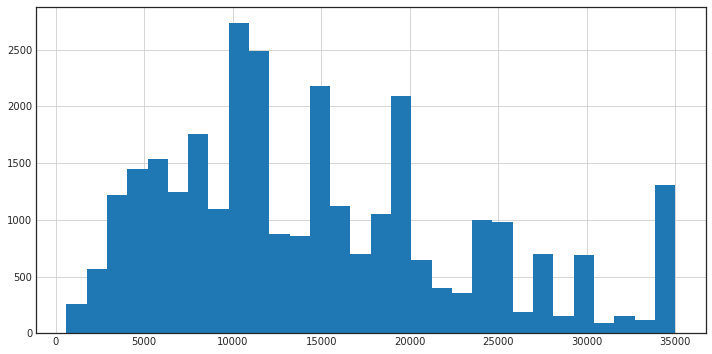

In [69]:
df_loan_app['loan_amnt'].hist(bins=30)

People like to ask for round numbers - 10000, 15000, and 20000 seem to be the most requested loans. 

#### Where are the loan applicants from?

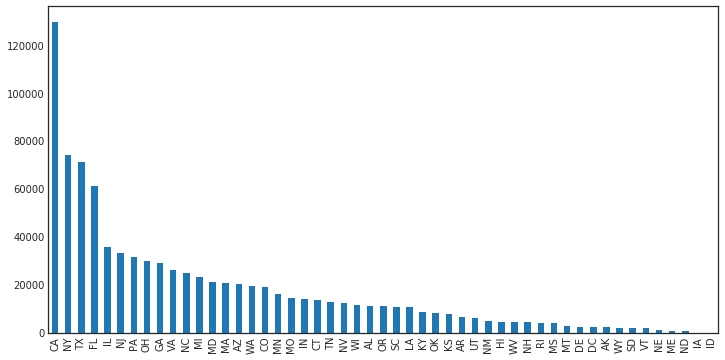

In [46]:
df_loan_app['addr_state'].sort_values().value_counts().plot(kind='bar', figsize=(12,6))

In [133]:
df_loan_app['addr_state'].describe()

count     887379
unique    51    
top       CA    
freq      129517
Name: addr_state, dtype: object

Mostly from California and NY, Texas, Florida and then kinda drops off. No missing values

#### What about the utilization? 

In [19]:
get_col_info(data_col=df_loan_app['all_util'])

count    710.000000
mean      60.981690
std       19.560706
min        0.000000
25%       48.150000
50%       61.800000
75%       74.800000
max      112.300000
Name: all_util, dtype: float64
Total Missing values = 29290


A lot of missing values here - only 21372 out of 887379 are available. Might need to drop this column from any modeling problems. What else can I do for these missing values? 

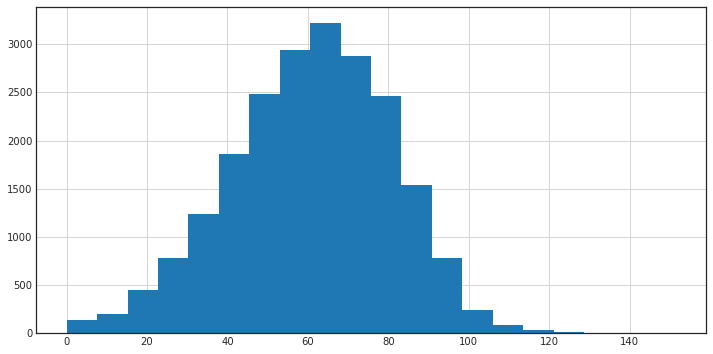

In [20]:
df_loan['all_util'].hist(bins=20)

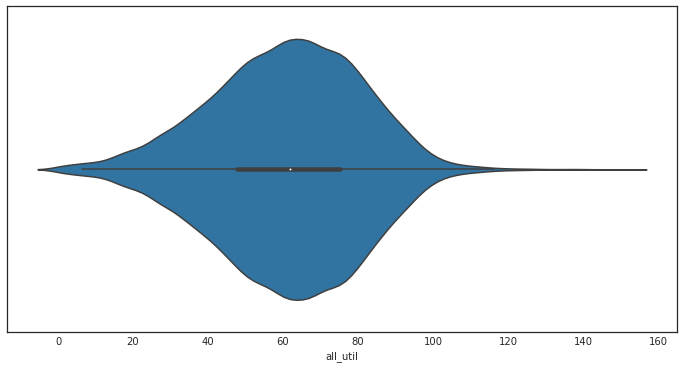

In [63]:
sns.violinplot(x=df_loan['all_util'].dropna())

#### Annual income

In [21]:
get_col_info(df_loan_app['annual_inc'])

count    2.999900e+04
mean     7.584405e+04
std      7.813661e+04
min      4.800000e+03
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.000000e+06
Name: annual_inc, dtype: float64
Total Missing values = 1


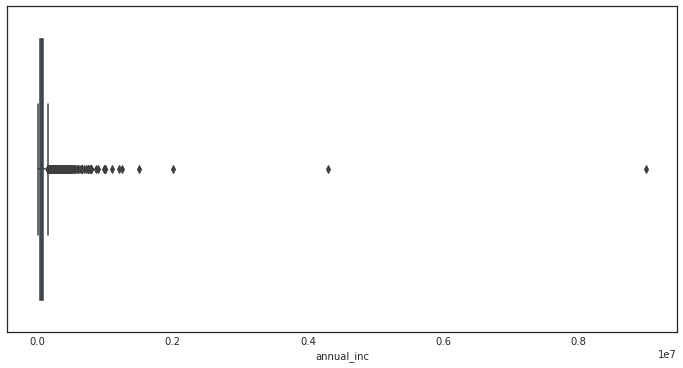

In [23]:
sns.boxplot(x=df_loan_app["annual_inc"].dropna())

Outliers - will need to transform this feature. A log should probably be a good enough transformation

#### Annual income joint

In [137]:
get_col_info(df_loan_app['annual_inc_joint'])

count    511.00000   
mean     109981.01159
std      52730.37985 
min      17950.00000 
25%      76032.50000 
50%      101771.00000
75%      132800.00000
max      500000.00000
Name: annual_inc_joint, dtype: float64
Total Missing values = 886868


Lots of missing values - most applicants are not applying with anyone else? 

#### Application type

In [138]:
get_col_info(df_loan_app['application_type'])

count     887379    
unique    2         
top       INDIVIDUAL
freq      886868    
Name: application_type, dtype: object
Total Missing values = 0


In [139]:
df_loan_app['application_type'].value_counts()

INDIVIDUAL    886868
JOINT         511   
Name: application_type, dtype: int64

As expected from joint income, only 511 applications are applying together

#### Drop joint applications - and related columns 

In [166]:
df_loan_app.drop(df_loan_app[df_loan_app['application_type']=='JOINT'].index, inplace=True)

In [167]:
df_loan_app['application_type'].value_counts()

INDIVIDUAL    29987
Name: application_type, dtype: int64

Joint application columns

In [168]:
joint_cols = ['dti_joint', 'verified_status_joint', 'annual_inc_joint']

In [169]:
df_loan_app.drop(labels=joint_cols,axis=1, inplace=True)

In [28]:
df_loan_app.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'policy_code', 'application_type', 'il_util',
       'all_util', 'total_rev_hi_lim'],
      dtype='object')

(29982, 31)

#### Delinquency 2 years

In [31]:
get_col_info(df_loan_app['delinq_2yrs'])

count    29980.000000
mean         0.319680
std          0.859723
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         20.000000
Name: delinq_2yrs, dtype: float64
Total Missing values = 2


#### Drop delinquency - most likely contains post app data

In [ ]:
df_loan_app.drop(labels=['delinq_2yrs'],axis=1,inplace=True)

#### Installment

In [145]:
get_col_info(df_loan_app['installment'])

count    886868.00000
mean     436.65293   
std      244.16397   
min      15.67000    
25%      260.60000   
50%      382.55000   
75%      572.47000   
max      1445.46000  
Name: installment, dtype: float64
Total Missing values = 0


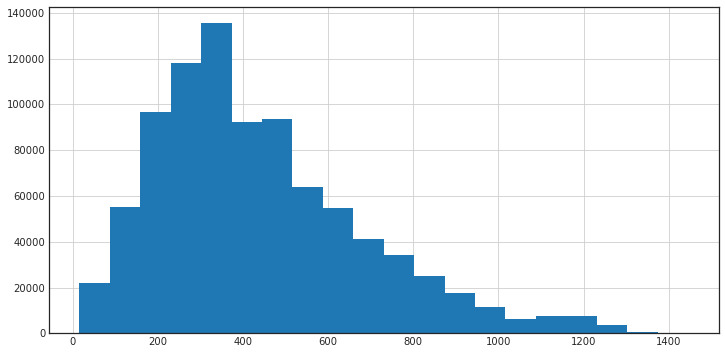

In [152]:
df_loan_app['installment'].hist(bins=20)

Most people are paying under 500$ a month

#### Terms - LC only offers 36m and 60m? 

In [153]:
get_col_info(df_loan_app['term'])

count     886868    
unique    2         
top        36 months
freq      620886    
Name: term, dtype: object
Total Missing values = 0


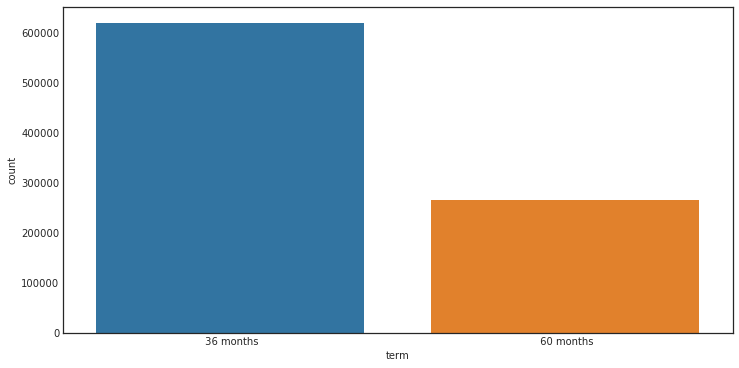

In [154]:
sns.countplot(df_loan_app['term'])

#### Home ownership

In [33]:
get_col_info(df_loan_app['home_ownership'])

count        29982
unique           5
top       MORTGAGE
freq         14950
Name: home_ownership, dtype: object
Total Missing values = 0


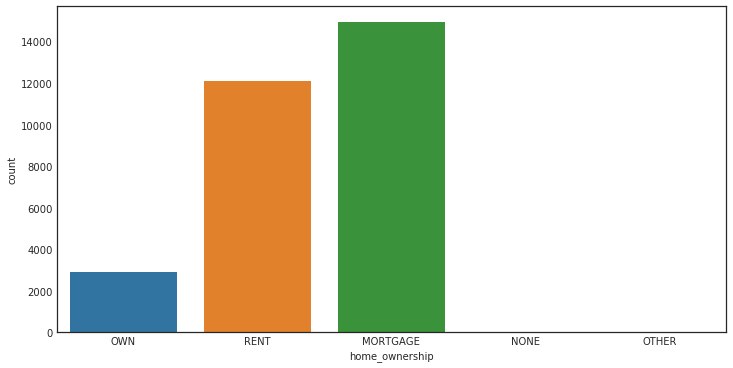

In [34]:
sns.countplot(df_loan_app['home_ownership'])

In [35]:
df_loan_app['home_ownership'].value_counts()

MORTGAGE    14950
RENT        12110
OWN          2912
OTHER           7
NONE            3
Name: home_ownership, dtype: int64

Will have to treat these columns separately - other and none

#### Employment length

In [157]:
get_col_info(df_loan_app['emp_length'])

count     886868   
unique    12       
top       10+ years
freq      291403   
Name: emp_length, dtype: object
Total Missing values = 0


In [159]:
df_loan_app['emp_length'].value_counts()

10+ years    291403
2 years      78833 
< 1 year     70559 
3 years      69994 
1 year       57064 
5 years      55686 
4 years      52496 
n/a          44764 
7 years      44576 
8 years      43930 
6 years      42928 
9 years      34635 
Name: emp_length, dtype: int64

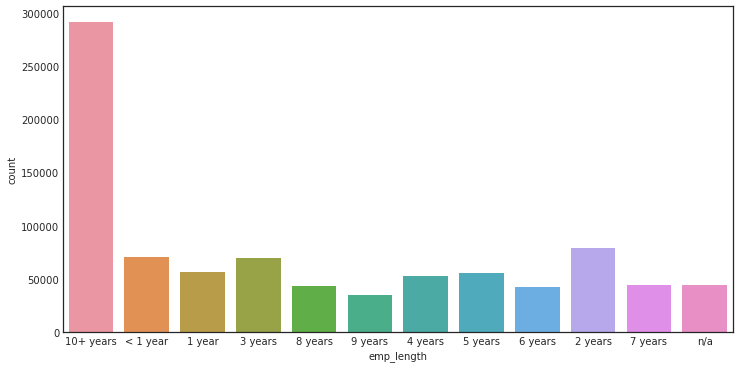

In [158]:
sns.countplot(df_loan_app['emp_length'])

What does n/a mean in this case? How do I treat it? 

#### Description - to be dropped

In [46]:
df_loan_app['desc'].head()

84836       Borrower added on 09/25/13 > I wanted to consolidate my bills and pay off every little bill I have. I will pay off this loan with my Income tax coming up in a few months. I will also like to upgrade some stuff in my house. I will not have a problem paying this bill in the upcoming months. I just want to have bills here and ther<br>
513186    NaN                                                                                                                                                                                                                                                                                                                                            
382991    NaN                                                                                                                                                                                                                                                                                                       

#### Policy code - to be dropped

In [46]:
get_col_info(df_loan, 'policy_code')

count    887379.0
mean     1.0     
std      0.0     
min      1.0     
25%      1.0     
50%      1.0     
75%      1.0     
max      1.0     
Name: policy_code, dtype: float64
Total Missing values = 0


No variation at all - drop

In [47]:
df_loan_app.drop(labels=['policy_code'],axis=1, inplace=True)

#### Earliest credit line

In [54]:
get_col_info(df_loan_app['earliest_cr_line'])

count     29980   
unique    573     
top       Aug-2001
freq      226     
Name: earliest_cr_line, dtype: object
Total Missing values = 2


In [58]:
df_loan_app['earliest_cr_line'].value_counts().head()

Aug-2001    226
Aug-2000    226
Nov-2000    211
Oct-2000    206
Aug-2002    205
Name: earliest_cr_line, dtype: int64

This is probably very important and I will need to transform this to a numerical value - subtract months from current month? 

### Look at the columns left - verification status, 

In [62]:
df_loan_app[['verification_status', 'purpose', 'title',
             'zip_code', 'addr_state', 'dti',
             'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
             'initial_list_status', 'il_util',
             'all_util', 'total_rev_hi_lim']].head()

,verification_status,purpose,title,zip_code,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,il_util,all_util,total_rev_hi_lim
84836,Source Verified,credit_card,Consolidate Bills,780xx,TX,26.00,0.0,979.0,35.0,36.0,w,NaN,NaN,2800.0
513186,Verified,debt_consolidation,Debt consolidation,193xx,PA,20.43,0.0,17407.0,65.2,32.0,w,NaN,NaN,26700.0
382991,Not Verified,debt_consolidation,Debt consolidation,190xx,PA,7.70,0.0,1788.0,55.9,22.0,w,NaN,NaN,3200.0
168223,Verified,debt_consolidation,GOOD,606xx,IL,15.38,0.0,8176.0,76.4,17.0,f,NaN,NaN,10700.0
410475,Verified,credit_card,Credit card refinancing,532xx,WI,6.27,0.0,18494.0,98.9,35.0,w,NaN,NaN,18700.0


Purpose and title are kind of the same - will only keep one of them 


In [63]:
df_loan_app['pub_rec'].value_counts()

0.0     25382
1.0     3808 
2.0     510  
3.0     142  
4.0     66   
5.0     32   
6.0     15   
7.0     11   
8.0     9    
10.0    2    
15.0    1    
9.0     1    
13.0    1    
Name: pub_rec, dtype: int64

Keep this public record - might be useful

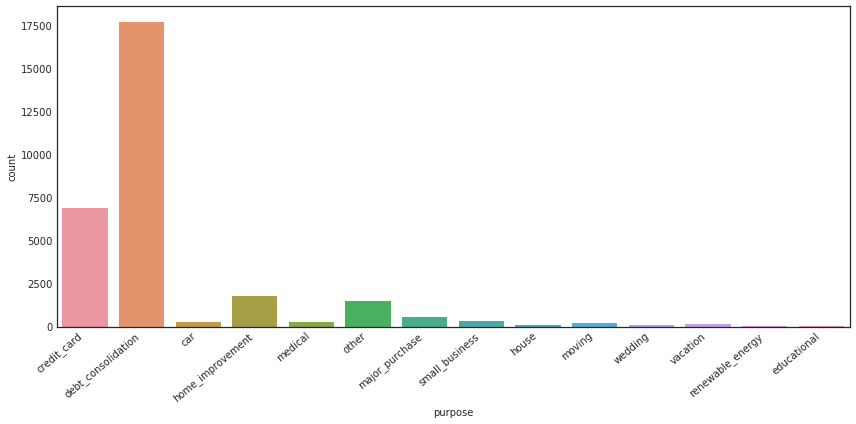

In [77]:
ax = sns.countplot(x="purpose",data = df_loan_app )
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

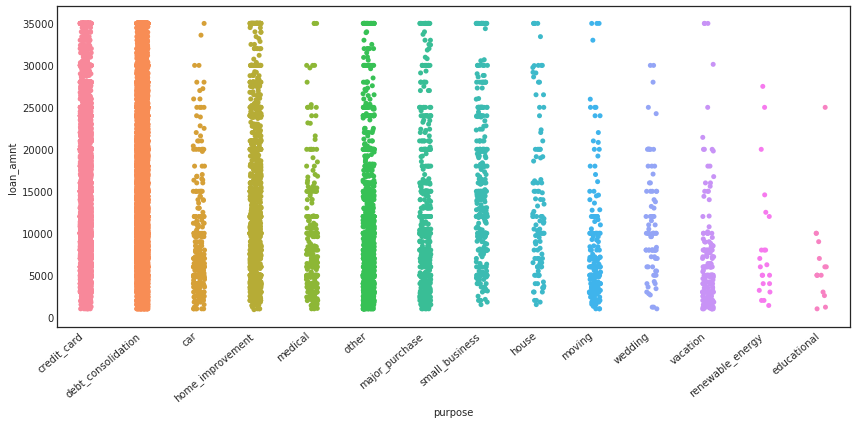

In [91]:
ax = sns.stripplot(x="purpose",y="loan_amnt",data = df_loan_app,jitter=True )
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Loan amounts for education, renewable_enery etc are closer to the lower end of the spectrum

In [75]:
df_loan_app['purpose'].value_counts()

debt_consolidation    17713
credit_card           6911 
home_improvement      1798 
other                 1480 
major_purchase        559  
small_business        337  
car                   300  
medical               277  
moving                195  
vacation              183  
house                 112  
wedding               80   
renewable_energy      22   
educational           15   
Name: purpose, dtype: int64

#### Revol util and balance

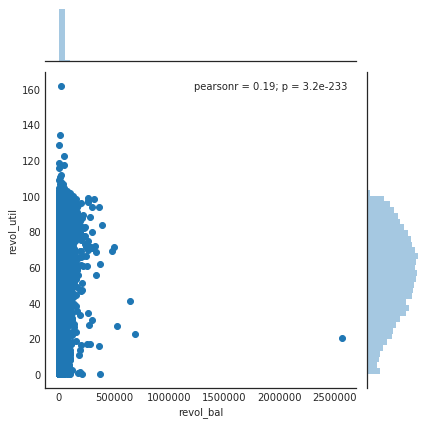

In [79]:
sns.jointplot(x='revol_bal', y='revol_util',data=df_loan_app)

There are some outliers for balance - will need to floor this? 

#### Initial list status - whole loans and fractional loans

For whole loans, the investor has to invest fully? Typically, for an investor you can invest in a pool of loans, but for whole loans you need to invest the entire loan amount. 
[See here](https://www.lendacademy.com/lending-club-whole-loan-program-one-year-later/)

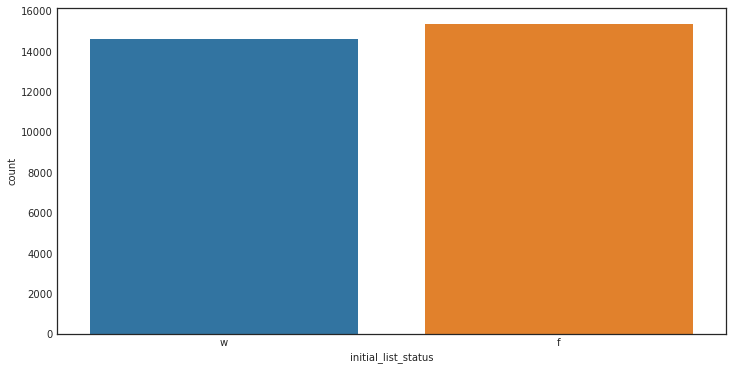

In [81]:
sns.countplot(x="initial_list_status", data=df_loan_app)

Cannot notice much difference between whole and fractional loans for interest

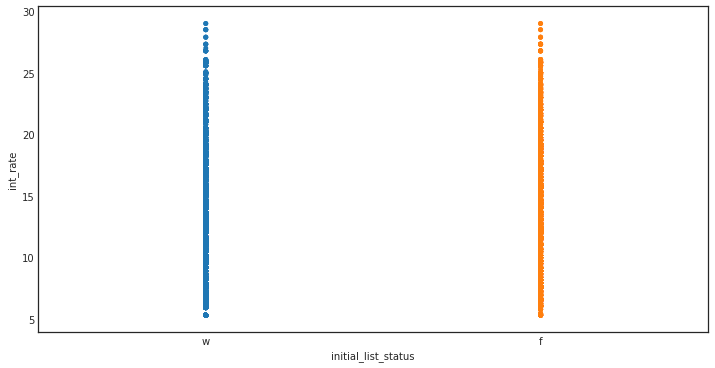

In [82]:
sns.stripplot(x="initial_list_status", y="int_rate", data=df_loan_app);

#### Total accounts

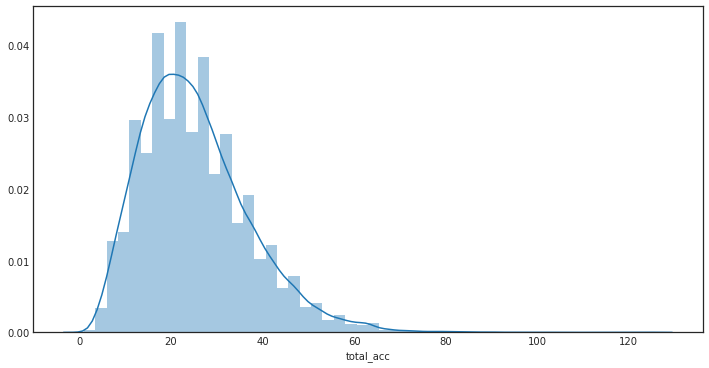

In [87]:
sns.distplot(df_loan_app['total_acc'].dropna())

#### Remove util variables - post app info

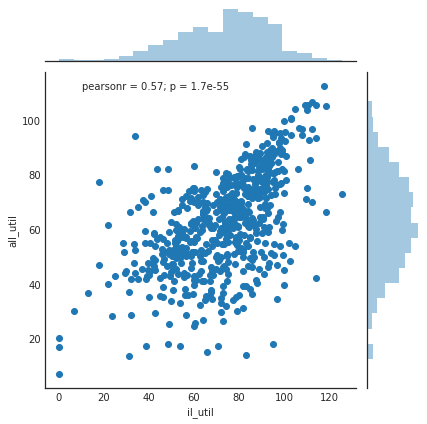

In [92]:
sns.jointplot(x='il_util',y='all_util',data=df_loan_app)

#### Total revolving high credit limit

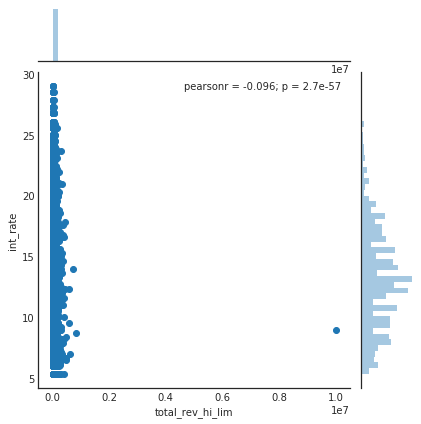

In [113]:
sns.jointplot(x='total_rev_hi_lim',y='int_rate',data=df_loan_app)

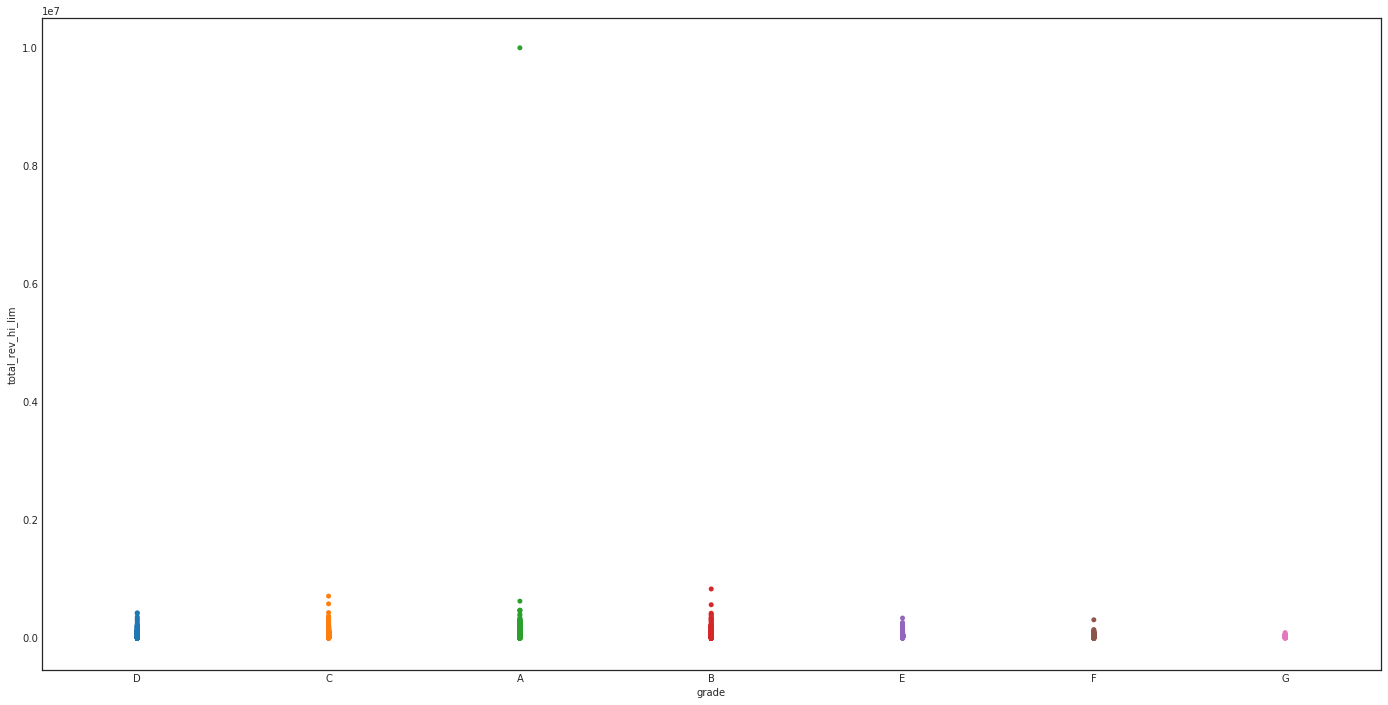

In [114]:
sns.stripplot(x='grade',y='total_rev_hi_lim',data=df_loan_app)

If a high revolving credit limit a good thing? Kind of captures the fact that someone else was willing to extend a high credit limit? 
Remove outliers

#### Grade and interest - the targets 

In [48]:
get_col_info(df_loan,'grade')

count     887379
unique    7     
top       B     
freq      254535
Name: grade, dtype: object
Total Missing values = 0


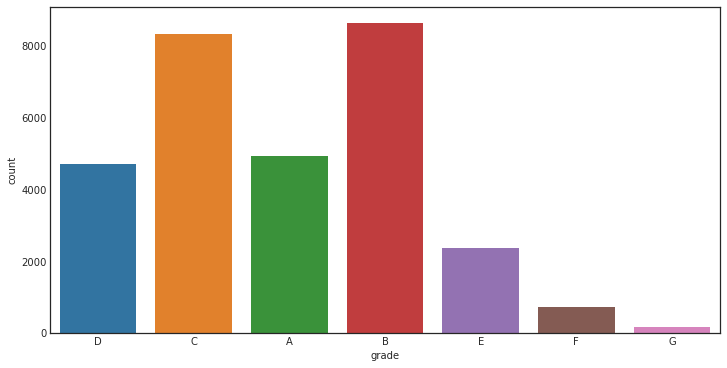

In [96]:
plot_categorical_counts(df_loan_app['grade'])

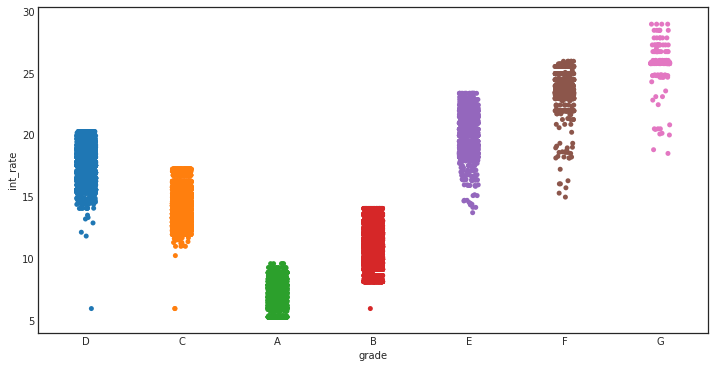

In [95]:
sns.stripplot(x='grade',y='int_rate',data=df_loan_app,jitter=True)

Barring a few anomalies,the grade and the interest rate vary together as expected

Interest rate

In [53]:
get_col_info(df_loan,'int_rate')

count    887379.00000
mean     13.24674    
std      4.38187     
min      5.32000     
25%      9.99000     
50%      12.99000    
75%      16.20000    
max      28.99000    
Name: int_rate, dtype: float64
Total Missing values = 0


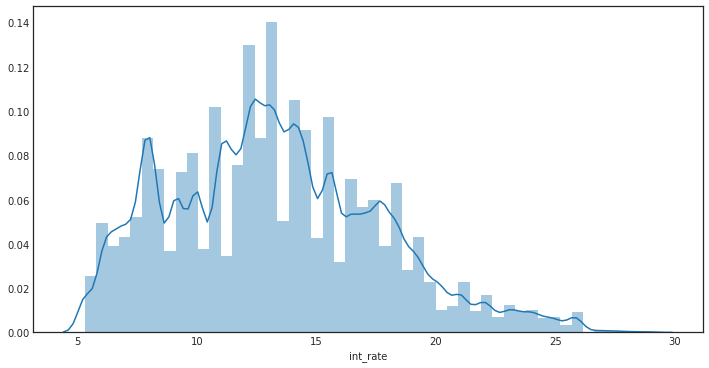

In [55]:
sns.distplot(df_loan['int_rate'],kde=True, rug=False)

Interest varies from 5.32 percent to 28.99 

#### How do the features correlate with each other?

Scatter matrix plots

In [115]:
numerical_subset = ['dti', 'int_rate','loan_amnt', 'revol_bal','revol_util',
          'annual_inc','total_rev_hi_lim']

In [100]:
from pandas.tools.plotting import scatter_matrix

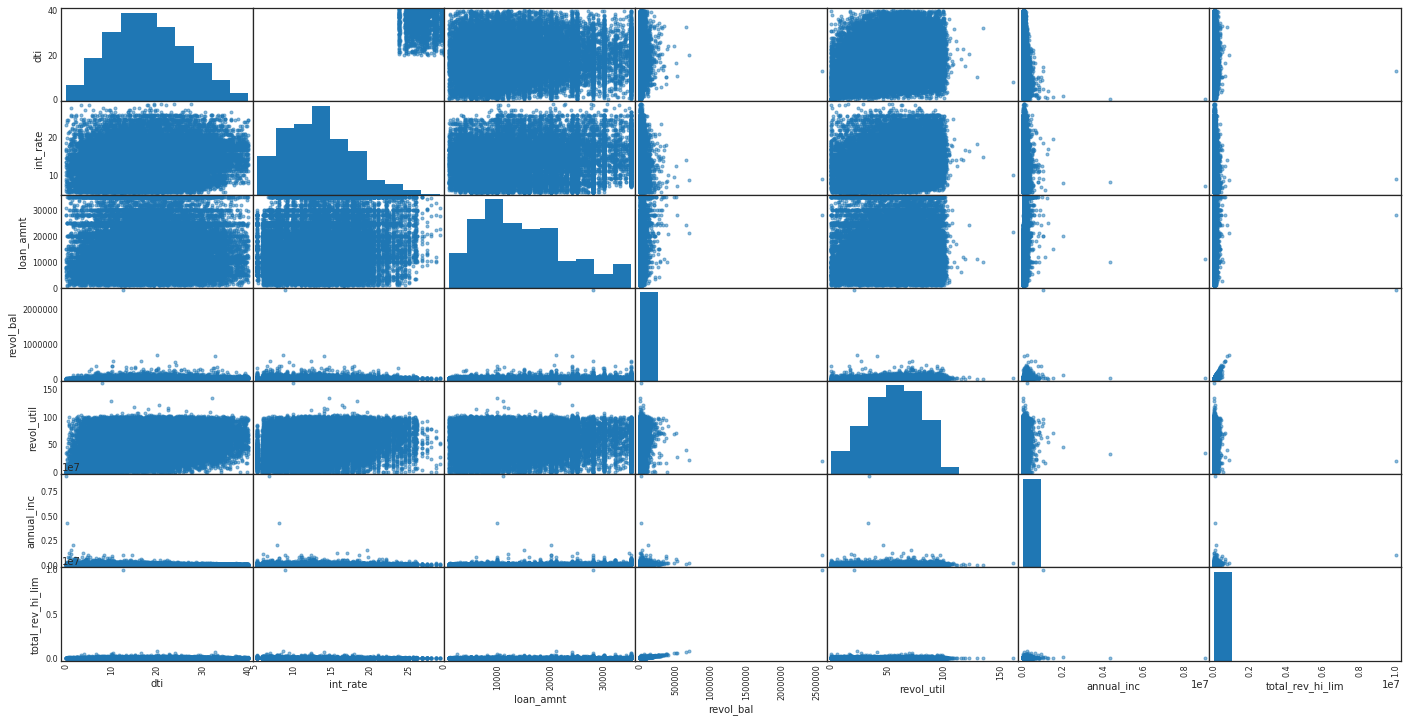

In [112]:
axarr = pd.scatter_matrix(df_loan_app[subset])
axarr[0,1].set_ylim(-10,10)
axarr[0,1].set_xlim(-10,10)
plt.rcParams["figure.figsize"] = (24, 12)
plt.draw()

Hard to see any kind of pattern here - categorical variables hold the key? 

### Remove other features that don't seem useful


In [116]:
df_loan_app.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'policy_code', 'application_type', 'il_util', 'all_util',
       'total_rev_hi_lim'],
      dtype='object')

In [227]:
drop_other_unused_features(df_loan_app)

In [228]:
df_loan_app.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'total_rev_hi_lim'],
      dtype='object')

In [229]:
df_loan_app.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,addr_state,dti,earliest_cr_line,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rev_hi_lim
537675,11000.0,36 months,8.18,345.62,2 years,RENT,51800.0,Source Verified,credit_card,773xx,TX,17.93,Aug-2009,0.0,10138.0,69.0,18.0,w,14700.0
180577,25000.0,60 months,15.31,598.83,10+ years,MORTGAGE,120000.0,Source Verified,debt_consolidation,305xx,GA,12.36,Aug-1995,0.0,18684.0,64.9,28.0,w,28800.0
785526,12375.0,60 months,16.55,304.57,7 years,MORTGAGE,42000.0,Source Verified,home_improvement,302xx,GA,22.60,Aug-1999,0.0,6036.0,31.3,38.0,w,19300.0
67041,4000.0,36 months,15.10,138.86,8 years,RENT,32000.0,Source Verified,debt_consolidation,741xx,OK,29.71,Aug-1985,1.0,3952.0,63.7,17.0,f,6200.0
369686,1000.0,36 months,13.98,34.17,10+ years,MORTGAGE,38000.0,Not Verified,debt_consolidation,935xx,CA,26.12,Dec-2000,0.0,5701.0,65.5,31.0,f,8700.0


In [230]:
df_loan_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29987 entries, 537675 to 66355
Data columns (total 19 columns):
loan_amnt              29987 non-null float64
term                   29987 non-null object
int_rate               29987 non-null float64
installment            29987 non-null float64
emp_length             29987 non-null object
home_ownership         29987 non-null object
annual_inc             29987 non-null float64
verification_status    29987 non-null object
purpose                29987 non-null object
zip_code               29987 non-null object
addr_state             29987 non-null object
dti                    29987 non-null float64
earliest_cr_line       29987 non-null object
pub_rec                29987 non-null float64
revol_bal              29987 non-null float64
revol_util             29975 non-null float64
total_acc              29987 non-null float64
initial_list_status    29987 non-null object
total_rev_hi_lim       27640 non-null float64
dtypes: float64(10), objec

## Target variable 

In [256]:
target = df_loan_app['int_rate']

In [257]:
target.head()

537675    8.18 
180577    15.31
785526    16.55
67041     15.10
369686    13.98
Name: int_rate, dtype: float64

In [258]:
df_loan_app.drop(labels=['int_rate'],axis=1,inplace=True)

## Transformations

### Numerical

#### Earliest credit line

In [225]:
df_loan_app.dropna(axis=0,how='any',subset=['earliest_cr_line'],inplace=True)

In [231]:
df_loan_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29987 entries, 537675 to 66355
Data columns (total 19 columns):
loan_amnt              29987 non-null float64
term                   29987 non-null object
int_rate               29987 non-null float64
installment            29987 non-null float64
emp_length             29987 non-null object
home_ownership         29987 non-null object
annual_inc             29987 non-null float64
verification_status    29987 non-null object
purpose                29987 non-null object
zip_code               29987 non-null object
addr_state             29987 non-null object
dti                    29987 non-null float64
earliest_cr_line       29987 non-null object
pub_rec                29987 non-null float64
revol_bal              29987 non-null float64
revol_util             29975 non-null float64
total_acc              29987 non-null float64
initial_list_status    29987 non-null object
total_rev_hi_lim       27640 non-null float64
dtypes: float64(10), objec

In [232]:
df_loan_app['earliest_cr_line_days'] = df_loan_app['earliest_cr_line'].apply(
    lambda x: convert_cr_line_days(x))

In [233]:
df_loan_app['earliest_cr_line_days'].describe()

count    29987.00000
mean     7116.77384 
std      2703.62575 
min      1795.00000 
25%      5236.00000 
50%      6605.00000 
75%      8462.00000 
max      26206.00000
Name: earliest_cr_line_days, dtype: float64

In [234]:
df_loan_app[df_loan_app['earliest_cr_line_days'] > 24000].head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,addr_state,dti,earliest_cr_line,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rev_hi_lim,earliest_cr_line_days
14118,6000.0,36 months,10.59,195.27,6 years,MORTGAGE,33360.0,Not Verified,home_improvement,648xx,MO,0.0,Jan-1946,2.0,0.0,0.0,7.0,f,NaN,26206


In [254]:
df_loan_app.drop(labels=['earliest_cr_line'],axis=1,inplace=True)

#### Skewed features with outliers

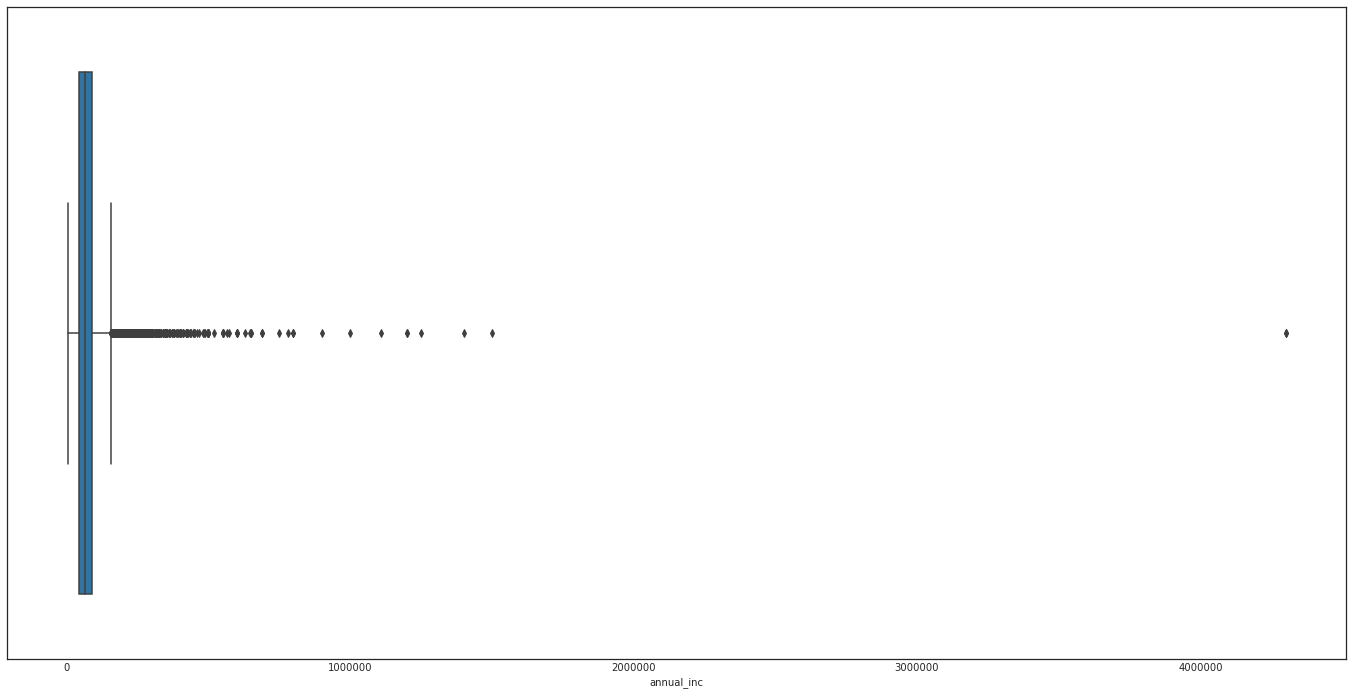

In [192]:
sns.boxplot(df_loan_app['annual_inc'])

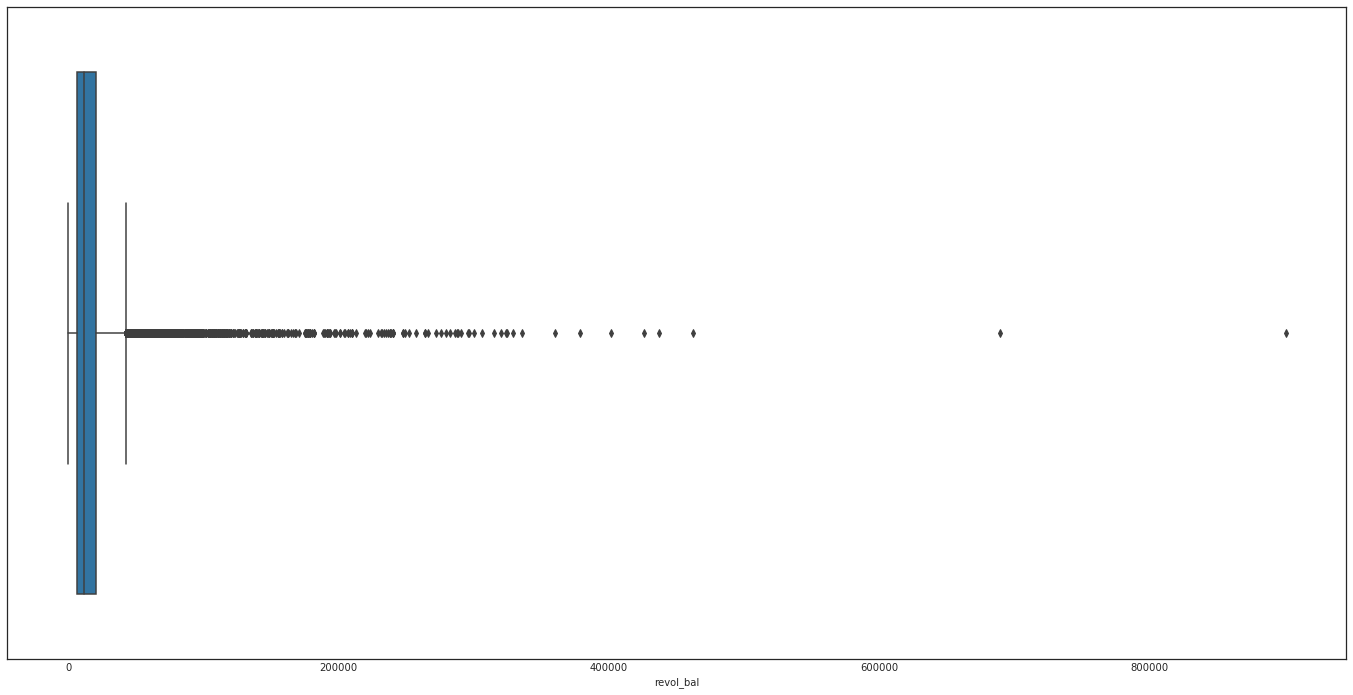

In [193]:
sns.boxplot(df_loan_app['revol_bal'])

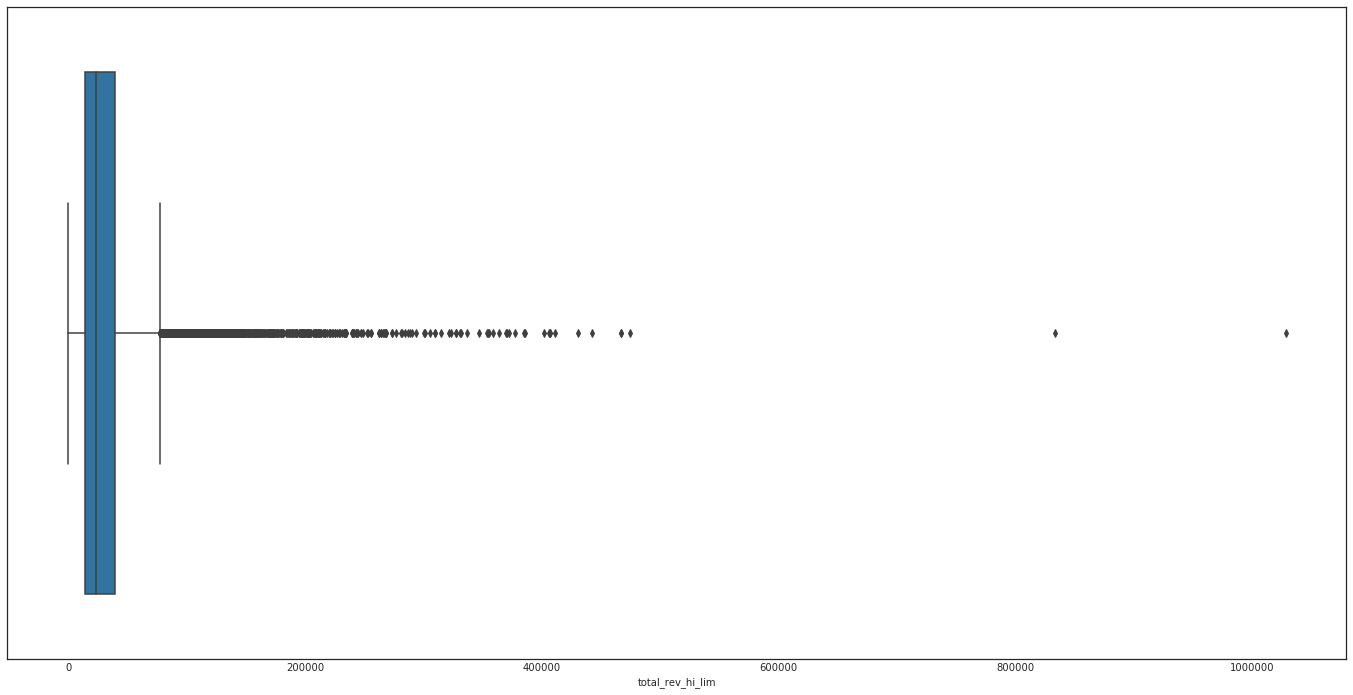

In [194]:
sns.boxplot(df_loan_app['total_rev_hi_lim'])

** Transform these variables **

In [235]:
# Annual income, revol_bal, and revol_util has outliers
# Scale them 
skewed = ['annual_inc','revol_bal','total_rev_hi_lim']
df_loan_app[skewed] = transform_skewed_features(df_loan_app[skewed])

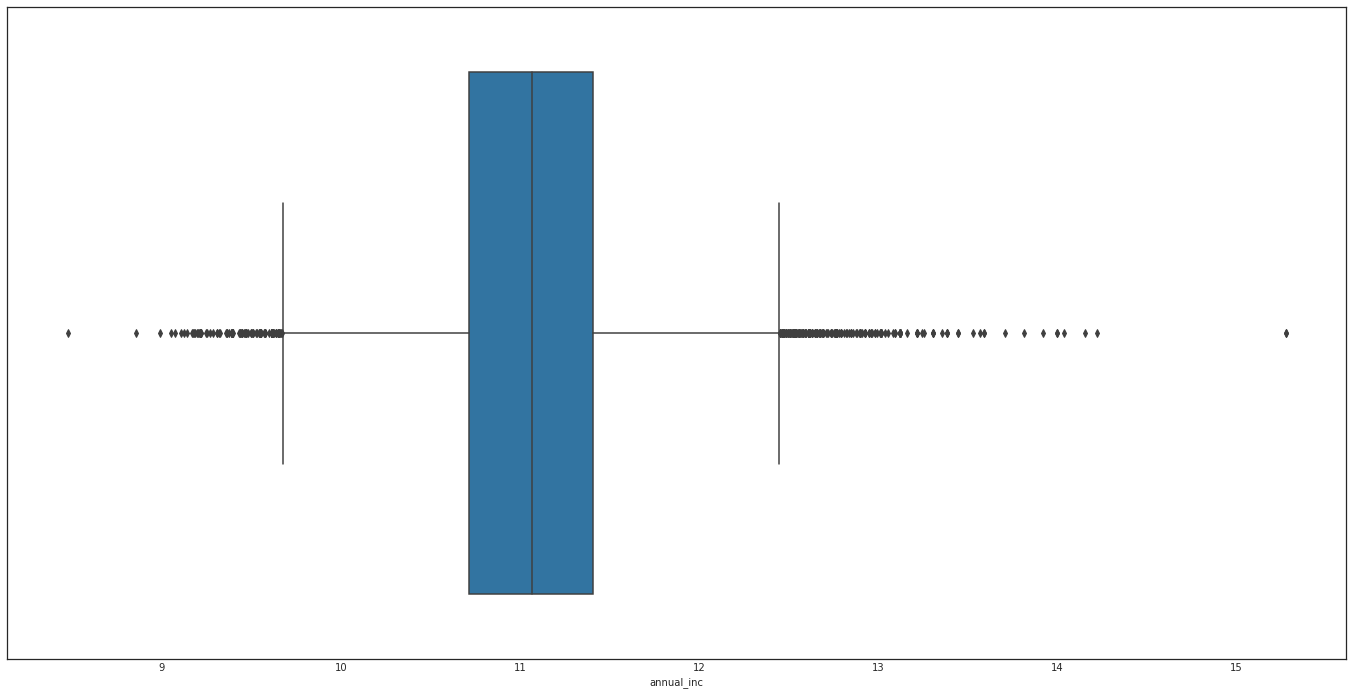

In [203]:
sns.boxplot(df_loan_app['annual_inc'])

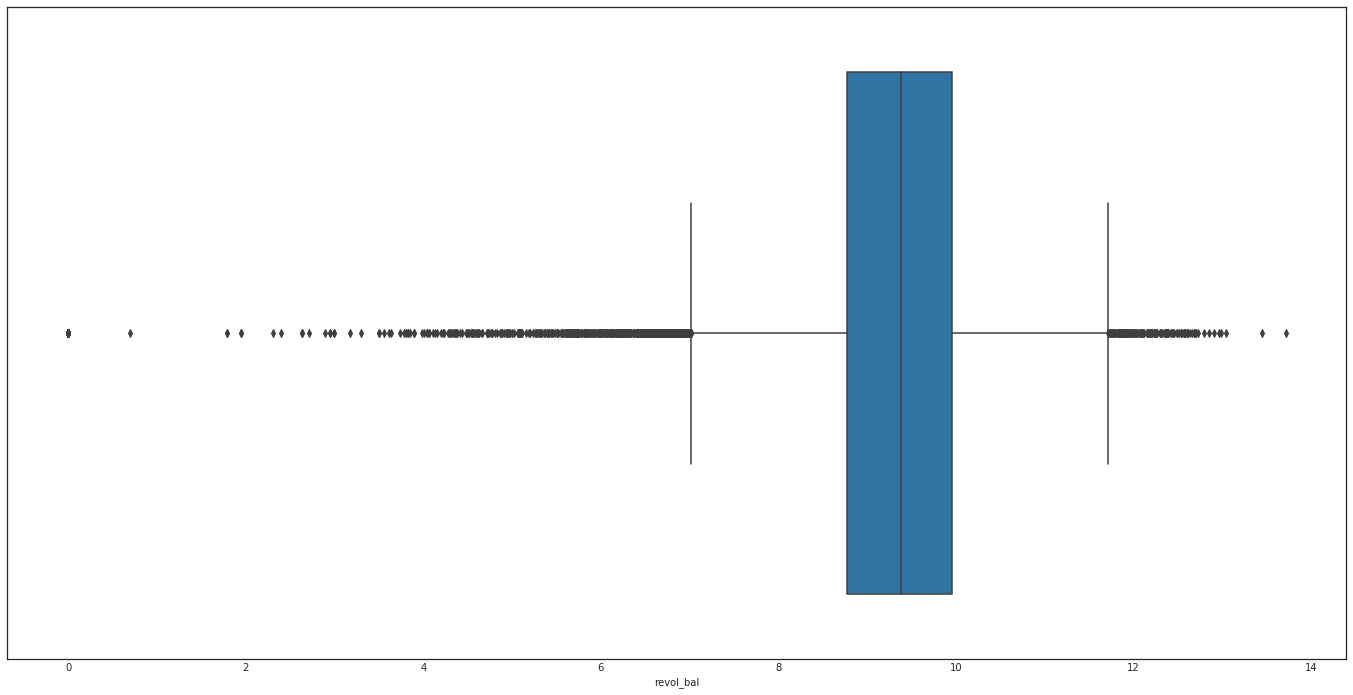

In [204]:
sns.boxplot(df_loan_app['revol_bal'])

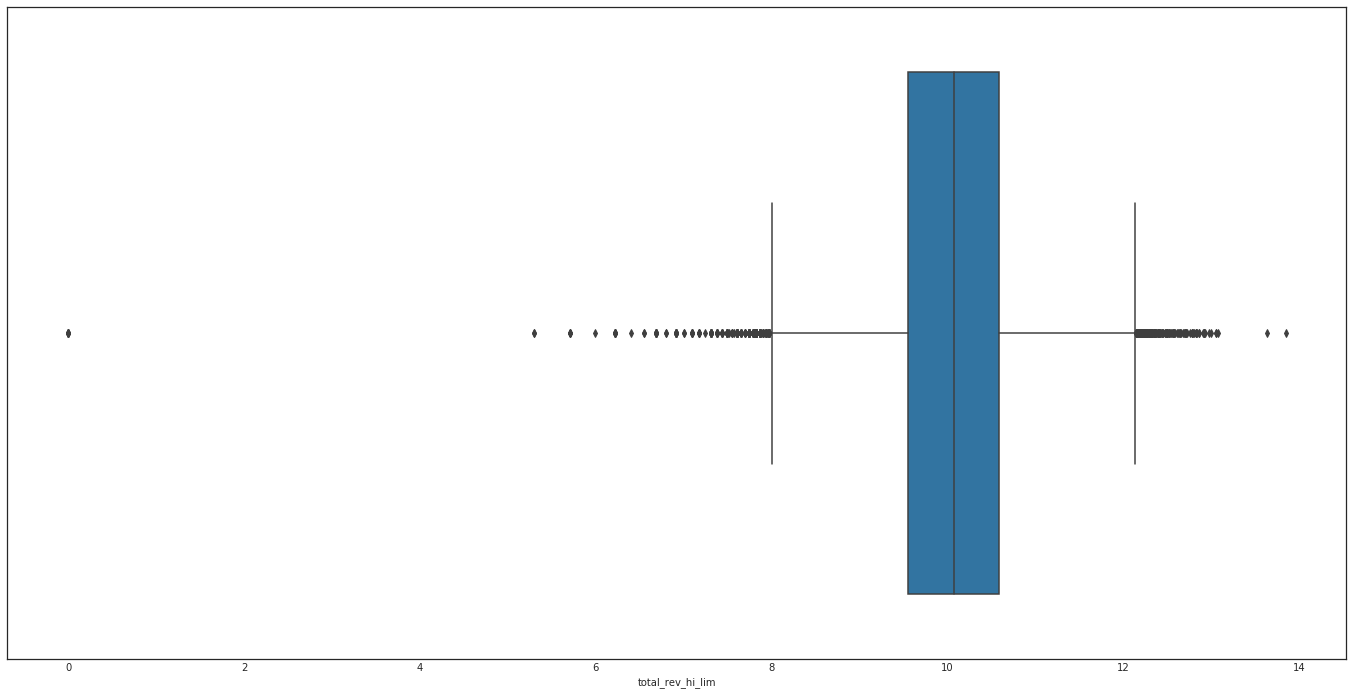

In [236]:
sns.boxplot(df_loan_app['total_rev_hi_lim'])

#### Do median imputation for total_rev_hi_lim

In [243]:
median_rev_hi_lim = df_loan_app['total_rev_hi_lim'].median()

In [245]:
df_loan_app['total_rev_hi_lim'].fillna(median_rev_hi_lim,inplace=True)

In [246]:
df_loan_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29987 entries, 537675 to 66355
Data columns (total 20 columns):
loan_amnt                29987 non-null float64
term                     29987 non-null object
int_rate                 29987 non-null float64
installment              29987 non-null float64
emp_length               29987 non-null object
home_ownership           29987 non-null object
annual_inc               29987 non-null float64
verification_status      29987 non-null object
purpose                  29987 non-null object
zip_code                 29987 non-null object
addr_state               29987 non-null object
dti                      29987 non-null float64
earliest_cr_line         29987 non-null object
pub_rec                  29987 non-null float64
revol_bal                29987 non-null float64
revol_util               29975 non-null float64
total_acc                29987 non-null float64
initial_list_status      29987 non-null object
total_rev_hi_lim         29987 non-n

#### Also for revolving utilization

In [249]:
median_rev_util = df_loan_app['revol_util'].median()
df_loan_app['revol_util'].fillna(median_rev_util,inplace=True)

#### Apply min max scaling for all numerical features

In [247]:
numerical_features = ['earliest_cr_line_days','annual_inc','loan_amnt',
                      'revol_util','total_acc','pub_rec','revol_bal','dti',
                      'total_rev_hi_lim','installment']

In [250]:
df_loan_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29987 entries, 537675 to 66355
Data columns (total 20 columns):
loan_amnt                29987 non-null float64
term                     29987 non-null object
int_rate                 29987 non-null float64
installment              29987 non-null float64
emp_length               29987 non-null object
home_ownership           29987 non-null object
annual_inc               29987 non-null float64
verification_status      29987 non-null object
purpose                  29987 non-null object
zip_code                 29987 non-null object
addr_state               29987 non-null object
dti                      29987 non-null float64
earliest_cr_line         29987 non-null object
pub_rec                  29987 non-null float64
revol_bal                29987 non-null float64
revol_util               29987 non-null float64
total_acc                29987 non-null float64
initial_list_status      29987 non-null object
total_rev_hi_lim         29987 non-n

In [251]:
df_loan_app = scale_min_max(df_loan_app,numerical_feature_list=numerical_features)

In [255]:
df_loan_app.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rev_hi_lim,earliest_cr_line_days
537675,0.30435,36 months,8.18,0.24305,2 years,RENT,0.34992,Source Verified,credit_card,773xx,TX,0.44836,0.00000,0.67277,0.38270,0.14545,w,0.69317,0.04867
180577,0.71014,60 months,15.31,0.42961,10+ years,MORTGAGE,0.47351,Source Verified,debt_consolidation,305xx,GA,0.30908,0.00000,0.71736,0.35996,0.23636,w,0.74175,0.25816
785526,0.34420,60 months,16.55,0.21280,7 years,MORTGAGE,0.31907,Source Verified,home_improvement,302xx,GA,0.56514,0.00000,0.63496,0.17360,0.32727,w,0.71284,0.19831
67041,0.10145,36 months,15.10,0.09071,8 years,RENT,0.27906,Source Verified,debt_consolidation,741xx,OK,0.74294,0.04762,0.60407,0.35330,0.13636,f,0.63082,0.40777
369686,0.01449,36 months,13.98,0.01357,10+ years,MORTGAGE,0.30434,Not Verified,debt_consolidation,935xx,CA,0.65316,0.00000,0.63079,0.36328,0.26364,f,0.65528,0.17832


### Convert categorical columns to one hot type

In [259]:
df_loan_app.columns

Index(['loan_amnt', 'term', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rev_hi_lim', 'earliest_cr_line_days'],
      dtype='object')

In [260]:
categorical_features = ['term', 'emp_length',
       'home_ownership',  'verification_status', 'purpose',
       'zip_code', 'addr_state','initial_list_status']

In [261]:
# Convert categorical to one-hot encoding using pandas.get_dummies()
features = pd.get_dummies(df_loan_app,columns=categorical_features)

In [262]:
features.head()

,loan_amnt,installment,annual_inc,dti,pub_rec,revol_bal,revol_util,total_acc,total_rev_hi_lim,earliest_cr_line_days,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
537675,0.30435,0.24305,0.34992,0.44836,0.00000,0.67277,0.38270,0.14545,0.69317,0.04867,...,1,0,0,0,0,0,0,0,0,1
180577,0.71014,0.42961,0.47351,0.30908,0.00000,0.71736,0.35996,0.23636,0.74175,0.25816,...,0,0,0,0,0,0,0,0,0,1
785526,0.34420,0.21280,0.31907,0.56514,0.00000,0.63496,0.17360,0.32727,0.71284,0.19831,...,0,0,0,0,0,0,0,0,0,1
67041,0.10145,0.09071,0.27906,0.74294,0.04762,0.60407,0.35330,0.13636,0.63082,0.40777,...,0,0,0,0,0,0,0,0,1,0
369686,0.01449,0.01357,0.30434,0.65316,0.00000,0.63079,0.36328,0.26364,0.65528,0.17832,...,0,0,0,0,0,0,0,0,1,0


'01/09/2012'

### Check out how many members are in common between 2007-2015 and 2016 Q1

In [46]:
df_2016_q1 = pd.read_csv('../data/LoanStats_2016Q1.csv',low_memory=False)

Index(['Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)'], dtype='object')

In [ ]:
df_2016_q1[df_2016_q1['']]

/home/vijay/tools/miniconda3/envs/deep-learner/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,18,46,54,111,122,123,124,127,128,129,132) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util',
       'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util',
       ...
       'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp',
       'total_rev_hi_lim', 'verification_status', 'verification_status_joint',
       'zip_code'],
      dtype='object', length=136)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524098 entries, 0 to 1524097
Data columns (total 136 columns):
id                                            21 non-null object
member_id                                     0 non-null float64
loan_amnt                                     1524077 non-null float64
funded_amnt                                   1524077 non-null float64
funded_amnt_inv                               1524077 non-null float64
term                                          1524077 non-null object
int_rate                                      1524077 non-null float64
installment                                   1524077 non-null float64
grade                                         1524077 non-null object
sub_grade                                     1524077 non-null object
emp_title                                     1430443 non-null object
emp_length                                    1524077 non-null object
home_ownership                                15240